# Individual Assignment - Submission

> - **Course:** *CE/CZ 4042 - Neural Networks and Deep Learning* 
> - **Name:** *Singh Aishwarya*
> - **Matriculation Number:** *U1923952C*
> - **Part:** *A - Classification Problem*
> - **Question:** *4*

### Necessary Imports

In [1]:
# Basic Helper Libraries
import tensorflow
import pandas as pd
import time
import numpy as np

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Libraries for plotting and visualization
import pylab as plt
import matplotlib.pyplot as matplt

### Data Retrieval + Train-Test Split

In [2]:
# Accessing the features data in the csv file and assigning it to a dataframe
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
# Check the value count of the output
df['label'].value_counts()

reggae       100
pop          100
country      100
hiphop       100
blues        100
disco        100
classical    100
rock         100
jazz         100
metal        100
Name: label, dtype: int64

In [4]:
# Prepare Train and Test Dataframes
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # Divide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    # Scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [5]:
# Splitting the prepared dataframes (70% Training and 30% Test)
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


### Model Training - Answering the question

> **Question:** *After you are done with the 2-layer network, design a 3-layer network with two hidden-layers with ReLU activation, each consisting of the optimal number of neurons you obtained in Question 3, (apply a dropout with a probability of 0.3 for each hidden layer), and train it with a batch size of 1.*

In [6]:
# Setting the given parameters for the model
num_epochs = 50
num_labels = 10
num_features = 57
batch_size = 1
num_hidden = 32

In [7]:
# Designing the model with the given parameters
model = Sequential()
model.add(Dropout(0.3))
model.add(Dense(num_hidden, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_hidden, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

# Setting the loss to sparse_categorical_crossentropy as this is a classification problem
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Training the model
history = model.fit(X_train, y_train, 
                    epochs=num_epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test))

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 1.9857 - accuracy: 0.3086 - val_loss: 1.4856 - val_accuracy: 0.4733
Epoch 2/50
700/700 [==============================] - 1s 975us/step - loss: 1.5980 - accuracy: 0.4157 - val_loss: 1.3714 - val_accuracy: 0.4900
Epoch 3/50
700/700 [==============================] - 1s 823us/step - loss: 1.4472 - accuracy: 0.4714 - val_loss: 1.2430 - val_accuracy: 0.5467
Epoch 4/50
700/700 [==============================] - 1s 793us/step - loss: 1.3370 - accuracy: 0.5057 - val_loss: 1.2144 - val_accuracy: 0.5867
Epoch 5/50
700/700 [==============================] - 1s 779us/step - loss: 1.3436 - accuracy: 0.5329 - val_loss: 1.2094 - val_accuracy: 0.5633
Epoch 6/50
700/700 [==============================] - 1s 812us/step - loss: 1.2492 - accuracy: 0.5471 - val_loss: 1.1457 - val_accuracy: 0.5833
Epoch 7/50
700/700 [==============================] - 1s 773us/step - loss: 1.2964 - accuracy: 0.5329 - val_loss: 1.1864 - val_accuracy: 0

#### a) Plot the train and test accuracy of the 3-layer network against training epochs.

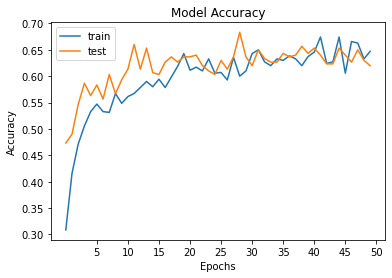

In [8]:
# Plot the train and test accuracies for number of layers = 3
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./Figures/PartAQuestion4-1.png')

#### b) Compare and comment on the performances of the optimal 2-layer network from your hyperparameter tuning in Question 2 and 3 and the 3-layer network.

> Based on the given accuracy plots for both the optimal, hyperparameter tuned 2-layer network and the 3-layer network, it can be seen that the optimal 2-layer network performs better, as the 3-layer network indicates a drop in the model accuracy. 